In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import LSHForest

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris=datasets.load_iris()


In [4]:
x=iris.data[:,:]
y=iris.target

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6)

In [6]:
lshf=LSHForest(random_state=42,n_estimators=1)

C:\anaconda\lib\site-packages\sklearn\neighbors\approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [7]:
lshf.fit(x_train)

C:\anaconda\lib\site-packages\sklearn\random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (4 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


LSHForest(min_hash_match=4, n_candidates=50, n_estimators=1, n_neighbors=5,
     radius=1.0, radius_cutoff_ratio=0.9, random_state=42)

In [8]:
x_train.shape

(60, 4)

In [9]:
y_train.shape

(60,)

In [10]:
lshf.get_params()

{'min_hash_match': 4,
 'n_candidates': 50,
 'n_estimators': 1,
 'n_neighbors': 5,
 'radius': 1.0,
 'radius_cutoff_ratio': 0.9,
 'random_state': 42}

In [11]:
a = lshf.trees_

In [12]:
len(a[0])

60

In [13]:
bin(a[0][10])

'0b10001110000010001100111010010010'

In [14]:
[bin(x) for x in a[0]]

['0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b10001110000010001100111010010010',
 '0b100011100000100011001

In [15]:
bb = [(bin(x)[2:]) for x in a[0]]


In [16]:
bb

['10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 '10001110000010001100111010010010',
 

In [23]:
input_arr=[]
for s in range(len(bb)):
    num=[int(bb[s][i:i+1]) for i in range(0, len(bb[s]), 1)]
    num=np.array(num)
    input_arr.append(num)
    
input_arr=np.asarray(input_arr)
(input_arr.shape)

(60, 32)

In [24]:
input_arr

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ..., 
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]])

In [25]:
noise_factor = 0.5
input_arr_noisy = input_arr + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=input_arr.shape) 
input_arr_noisy = np.clip(input_arr_noisy, 0., 1.)


In [26]:
type(y_train)

numpy.ndarray

In [28]:
label=y_train
label

array([0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1])

In [29]:
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


In [30]:
# this is our input placeholder
input_img = Input(shape=(32,))

In [31]:
#stacked layers of autoencoder
encoded = Dense(16, activation='relu')(input_img)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='sigmoid')(decoded)

In [32]:
autoencoder = Model(input_img, decoded)


In [33]:
#Let's also create a separate encoder model:
encoder = Model(input_img, encoded)


#create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(32,))


In [34]:
#create the decoder model
decoder = Model(input_img,decoded)


In [35]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
Total para

In [52]:
parameter=autoencoder.fit(input_arr_noisy,input_arr_noisy,
                          shuffle=True,epochs=2000,
                          batch_size=6,
                          validation_data=(input_arr_noisy,input_arr_noisy))
print(parameter)

Train on 60 samples, validate on 60 samples
Epoch 1/2000
60/60 [==============================] - 0s - loss: 0.4749 - acc: 0.4922 - val_loss: 0.4746 - val_acc: 0.4922
Epoch 2/2000
60/60 [==============================] - 0s - loss: 0.4748 - acc: 0.4922 - val_loss: 0.4746 - val_acc: 0.4922
Epoch 3/2000
60/60 [==============================] - 0s - loss: 0.4749 - acc: 0.4917 - val_loss: 0.4746 - val_acc: 0.4922
Epoch 4/2000
60/60 [==============================] - 0s - loss: 0.4749 - acc: 0.4922 - val_loss: 0.4746 - val_acc: 0.4922
Epoch 5/2000
60/60 [==============================] - 0s - loss: 0.4748 - acc: 0.4922 - val_loss: 0.4746 - val_acc: 0.4917
Epoch 6/2000
60/60 [==============================] - 0s - loss: 0.4748 - acc: 0.4917 - val_loss: 0.4746 - val_acc: 0.4917
Epoch 7/2000
60/60 [==============================] - 0s - loss: 0.4748 - acc: 0.4917 - val_loss: 0.4746 - val_acc: 0.4922
Epoch 8/2000
60/60 [==============================] - 0s - loss: 0.4748 - acc: 0.4917 - val_los

60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 67/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 68/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 69/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 70/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 71/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4742 - val_acc: 0.4917
Epoch 72/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4741 - val_acc: 0.4917
Epoch 73/2000
60/60 [==============================] - 0s - loss: 0.4744 - acc: 0.4917 - val_loss: 0.4741 - val_acc: 0.4917
Epoch 74/2000
60/60 [=

60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4738 - val_acc: 0.4917
Epoch 132/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4738 - val_acc: 0.4917
Epoch 133/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4738 - val_acc: 0.4917
Epoch 134/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4738 - val_acc: 0.4917
Epoch 135/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4738 - val_acc: 0.4917
Epoch 136/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4737 - val_acc: 0.4917
Epoch 137/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4737 - val_acc: 0.4917
Epoch 138/2000
60/60 [==============================] - 0s - loss: 0.4740 - acc: 0.4917 - val_loss: 0.4737 - val_acc: 0.4917
Epoch 139/2000


60/60 [==============================] - 0s - loss: 0.4736 - acc: 0.4911 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 197/2000
60/60 [==============================] - 0s - loss: 0.4736 - acc: 0.4911 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 198/2000
60/60 [==============================] - 0s - loss: 0.4735 - acc: 0.4906 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 199/2000
60/60 [==============================] - 0s - loss: 0.4736 - acc: 0.4906 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 200/2000
60/60 [==============================] - 0s - loss: 0.4736 - acc: 0.4906 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 201/2000
60/60 [==============================] - 0s - loss: 0.4735 - acc: 0.4906 - val_loss: 0.4733 - val_acc: 0.4917
Epoch 202/2000
60/60 [==============================] - 0s - loss: 0.4736 - acc: 0.4906 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 203/2000
60/60 [==============================] - 0s - loss: 0.4735 - acc: 0.4911 - val_loss: 0.4733 - val_acc: 0.4906
Epoch 204/2000


60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 262/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 263/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 264/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 265/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 266/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 267/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4729 - val_acc: 0.4911
Epoch 268/2000
60/60 [==============================] - 0s - loss: 0.4731 - acc: 0.4911 - val_loss: 0.4728 - val_acc: 0.4911
Epoch 269/2000


60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4911 - val_loss: 0.4724 - val_acc: 0.4911
Epoch 327/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4911 - val_loss: 0.4724 - val_acc: 0.4911
Epoch 328/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4906 - val_loss: 0.4724 - val_acc: 0.4906
Epoch 329/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4911 - val_loss: 0.4724 - val_acc: 0.4911
Epoch 330/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4906 - val_loss: 0.4724 - val_acc: 0.4906
Epoch 331/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4906 - val_loss: 0.4724 - val_acc: 0.4906
Epoch 332/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4906 - val_loss: 0.4724 - val_acc: 0.4906
Epoch 333/2000
60/60 [==============================] - 0s - loss: 0.4726 - acc: 0.4911 - val_loss: 0.4724 - val_acc: 0.4906
Epoch 334/2000


60/60 [==============================] - 0s - loss: 0.4722 - acc: 0.4906 - val_loss: 0.4719 - val_acc: 0.4901
Epoch 392/2000
60/60 [==============================] - 0s - loss: 0.4722 - acc: 0.4901 - val_loss: 0.4719 - val_acc: 0.4901
Epoch 393/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4901 - val_loss: 0.4719 - val_acc: 0.4906
Epoch 394/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4906 - val_loss: 0.4719 - val_acc: 0.4906
Epoch 395/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4906 - val_loss: 0.4719 - val_acc: 0.4906
Epoch 396/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4901 - val_loss: 0.4719 - val_acc: 0.4901
Epoch 397/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4906 - val_loss: 0.4719 - val_acc: 0.4906
Epoch 398/2000
60/60 [==============================] - 0s - loss: 0.4721 - acc: 0.4901 - val_loss: 0.4719 - val_acc: 0.4906
Epoch 399/2000


60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4906 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 457/2000
60/60 [==============================] - 0s - loss: 0.4717 - acc: 0.4901 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 458/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4906 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 459/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4901 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 460/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4901 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 461/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4901 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 462/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4906 - val_loss: 0.4714 - val_acc: 0.4901
Epoch 463/2000
60/60 [==============================] - 0s - loss: 0.4716 - acc: 0.4901 - val_loss: 0.4714 - val_acc: 0.4906
Epoch 464/2000


60/60 [==============================] - 0s - loss: 0.4712 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 522/2000
60/60 [==============================] - 0s - loss: 0.4712 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 523/2000
60/60 [==============================] - 0s - loss: 0.4712 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 524/2000
60/60 [==============================] - 0s - loss: 0.4711 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 525/2000
60/60 [==============================] - 0s - loss: 0.4711 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 526/2000
60/60 [==============================] - 0s - loss: 0.4711 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 527/2000
60/60 [==============================] - 0s - loss: 0.4711 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 528/2000
60/60 [==============================] - 0s - loss: 0.4711 - acc: 0.4901 - val_loss: 0.4709 - val_acc: 0.4901
Epoch 529/2000


60/60 [==============================] - 0s - loss: 0.4707 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 587/2000
60/60 [==============================] - 0s - loss: 0.4707 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 588/2000
60/60 [==============================] - 0s - loss: 0.4707 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 589/2000
60/60 [==============================] - 0s - loss: 0.4706 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 590/2000
60/60 [==============================] - 0s - loss: 0.4707 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 591/2000
60/60 [==============================] - 0s - loss: 0.4706 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 592/2000
60/60 [==============================] - 0s - loss: 0.4707 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 593/2000
60/60 [==============================] - 0s - loss: 0.4706 - acc: 0.4901 - val_loss: 0.4704 - val_acc: 0.4901
Epoch 594/2000


60/60 [==============================] - 0s - loss: 0.4702 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 652/2000
60/60 [==============================] - 0s - loss: 0.4702 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 653/2000
60/60 [==============================] - 0s - loss: 0.4702 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 654/2000
60/60 [==============================] - 0s - loss: 0.4701 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 655/2000
60/60 [==============================] - 0s - loss: 0.4701 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 656/2000
60/60 [==============================] - 0s - loss: 0.4702 - acc: 0.4901 - val_loss: 0.4700 - val_acc: 0.4901
Epoch 657/2000
60/60 [==============================] - 0s - loss: 0.4701 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 658/2000
60/60 [==============================] - 0s - loss: 0.4701 - acc: 0.4901 - val_loss: 0.4699 - val_acc: 0.4901
Epoch 659/2000


60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4906 - val_loss: 0.4695 - val_acc: 0.4901
Epoch 717/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4901 - val_loss: 0.4695 - val_acc: 0.4901
Epoch 718/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4901 - val_loss: 0.4695 - val_acc: 0.4901
Epoch 719/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4906 - val_loss: 0.4695 - val_acc: 0.4906
Epoch 720/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4906 - val_loss: 0.4695 - val_acc: 0.4901
Epoch 721/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4901 - val_loss: 0.4694 - val_acc: 0.4901
Epoch 722/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4901 - val_loss: 0.4694 - val_acc: 0.4901
Epoch 723/2000
60/60 [==============================] - 0s - loss: 0.4697 - acc: 0.4906 - val_loss: 0.4694 - val_acc: 0.4906
Epoch 724/2000


60/60 [==============================] - 0s - loss: 0.4693 - acc: 0.4906 - val_loss: 0.4691 - val_acc: 0.4911
Epoch 782/2000
60/60 [==============================] - 0s - loss: 0.4693 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 783/2000
60/60 [==============================] - 0s - loss: 0.4693 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 784/2000
60/60 [==============================] - 0s - loss: 0.4693 - acc: 0.4901 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 785/2000
60/60 [==============================] - 0s - loss: 0.4692 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 786/2000
60/60 [==============================] - 0s - loss: 0.4693 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 787/2000
60/60 [==============================] - 0s - loss: 0.4692 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4911
Epoch 788/2000
60/60 [==============================] - 0s - loss: 0.4692 - acc: 0.4906 - val_loss: 0.4690 - val_acc: 0.4906
Epoch 789/2000


60/60 [==============================] - 0s - loss: 0.4689 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 847/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 848/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 849/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 850/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 851/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 852/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 853/2000
60/60 [==============================] - 0s - loss: 0.4688 - acc: 0.4911 - val_loss: 0.4686 - val_acc: 0.4911
Epoch 854/2000


60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 911/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 912/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 913/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 914/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 915/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 916/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 917/2000
60/60 [==============================] - 0s - loss: 0.4684 - acc: 0.4911 - val_loss: 0.4682 - val_acc: 0.4911
Epoch 918/2000


60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4678 - val_acc: 0.4911
Epoch 976/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4678 - val_acc: 0.4911
Epoch 977/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4678 - val_acc: 0.4911
Epoch 978/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4678 - val_acc: 0.4911
Epoch 979/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4677 - val_acc: 0.4911
Epoch 980/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4678 - val_acc: 0.4911
Epoch 981/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4677 - val_acc: 0.4911
Epoch 982/2000
60/60 [==============================] - 0s - loss: 0.4680 - acc: 0.4911 - val_loss: 0.4677 - val_acc: 0.4911
Epoch 983/2000


60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4674 - val_acc: 0.4917
Epoch 1041/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4673 - val_acc: 0.4917
Epoch 1042/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4674 - val_acc: 0.4917
Epoch 1043/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4674 - val_acc: 0.4917
Epoch 1044/2000
60/60 [==============================] - 0s - loss: 0.4675 - acc: 0.4917 - val_loss: 0.4673 - val_acc: 0.4917
Epoch 1045/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4673 - val_acc: 0.4917
Epoch 1046/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4674 - val_acc: 0.4917
Epoch 1047/2000
60/60 [==============================] - 0s - loss: 0.4676 - acc: 0.4917 - val_loss: 0.4673 - val_acc: 0.4917
Epoch 10

60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4670 - val_acc: 0.4917
Epoch 1105/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4670 - val_acc: 0.4917
Epoch 1106/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4670 - val_acc: 0.4917
Epoch 1107/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4670 - val_acc: 0.4917
Epoch 1108/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4670 - val_acc: 0.4917
Epoch 1109/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4669 - val_acc: 0.4917
Epoch 1110/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4669 - val_acc: 0.4917
Epoch 1111/2000
60/60 [==============================] - 0s - loss: 0.4672 - acc: 0.4917 - val_loss: 0.4669 - val_acc: 0.4917
Epoch 11

60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1169/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1170/2000
60/60 [==============================] - 0s - loss: 0.4669 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1171/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1172/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1173/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1174/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 1175/2000
60/60 [==============================] - 0s - loss: 0.4668 - acc: 0.4917 - val_loss: 0.4666 - val_acc: 0.4917
Epoch 11

60/60 [==============================] - 0s - loss: 0.4665 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1233/2000
60/60 [==============================] - 0s - loss: 0.4664 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1234/2000
60/60 [==============================] - 0s - loss: 0.4665 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1235/2000
60/60 [==============================] - 0s - loss: 0.4665 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1236/2000
60/60 [==============================] - 0s - loss: 0.4665 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1237/2000
60/60 [==============================] - 0s - loss: 0.4665 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1238/2000
60/60 [==============================] - 0s - loss: 0.4664 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 1239/2000
60/60 [==============================] - 0s - loss: 0.4664 - acc: 0.4917 - val_loss: 0.4662 - val_acc: 0.4917
Epoch 12

60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4659 - val_acc: 0.4917
Epoch 1297/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4659 - val_acc: 0.4917
Epoch 1298/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4658 - val_acc: 0.4917
Epoch 1299/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4658 - val_acc: 0.4917
Epoch 1300/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4658 - val_acc: 0.4917
Epoch 1301/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4659 - val_acc: 0.4917
Epoch 1302/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4658 - val_acc: 0.4917
Epoch 1303/2000
60/60 [==============================] - 0s - loss: 0.4661 - acc: 0.4917 - val_loss: 0.4658 - val_acc: 0.4917
Epoch 13

60/60 [==============================] - 0s - loss: 0.4658 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1362/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1363/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1364/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1365/2000
60/60 [==============================] - 0s - loss: 0.4658 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1366/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1367/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4655 - val_acc: 0.4911
Epoch 1368/2000
60/60 [==============================] - 0s - loss: 0.4657 - acc: 0.4911 - val_loss: 0.4654 - val_acc: 0.4911
Epoch 13

60/60 [==============================] - 0s - loss: 0.4654 - acc: 0.4911 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1427/2000
60/60 [==============================] - 0s - loss: 0.4654 - acc: 0.4917 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1428/2000
60/60 [==============================] - 0s - loss: 0.4654 - acc: 0.4922 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1429/2000
60/60 [==============================] - 0s - loss: 0.4654 - acc: 0.4922 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1430/2000
60/60 [==============================] - 0s - loss: 0.4653 - acc: 0.4917 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1431/2000
60/60 [==============================] - 0s - loss: 0.4654 - acc: 0.4922 - val_loss: 0.4652 - val_acc: 0.4917
Epoch 1432/2000
60/60 [==============================] - 0s - loss: 0.4653 - acc: 0.4917 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 1433/2000
60/60 [==============================] - 0s - loss: 0.4653 - acc: 0.4917 - val_loss: 0.4651 - val_acc: 0.4917
Epoch 14

60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4648 - val_acc: 0.4922
Epoch 1491/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4647 - val_acc: 0.4922
Epoch 1492/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4647 - val_acc: 0.4922
Epoch 1493/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4648 - val_acc: 0.4922
Epoch 1494/2000
60/60 [==============================] - 0s - loss: 0.4649 - acc: 0.4922 - val_loss: 0.4648 - val_acc: 0.4922
Epoch 1495/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4647 - val_acc: 0.4922
Epoch 1496/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4647 - val_acc: 0.4922
Epoch 1497/2000
60/60 [==============================] - 0s - loss: 0.4650 - acc: 0.4922 - val_loss: 0.4647 - val_acc: 0.4922
Epoch 14

60/60 [==============================] - 0s - loss: 0.4647 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1556/2000
60/60 [==============================] - 0s - loss: 0.4646 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1557/2000
60/60 [==============================] - 0s - loss: 0.4646 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1558/2000
60/60 [==============================] - 0s - loss: 0.4647 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1559/2000
60/60 [==============================] - 0s - loss: 0.4646 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1560/2000
60/60 [==============================] - 0s - loss: 0.4647 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1561/2000
60/60 [==============================] - 0s - loss: 0.4646 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 1562/2000
60/60 [==============================] - 0s - loss: 0.4646 - acc: 0.4922 - val_loss: 0.4644 - val_acc: 0.4922
Epoch 15

60/60 [==============================] - 0s - loss: 0.4643 - acc: 0.4927 - val_loss: 0.4641 - val_acc: 0.4938
Epoch 1620/2000
60/60 [==============================] - 0s - loss: 0.4643 - acc: 0.4932 - val_loss: 0.4640 - val_acc: 0.4927
Epoch 1621/2000
60/60 [==============================] - 0s - loss: 0.4643 - acc: 0.4922 - val_loss: 0.4640 - val_acc: 0.4932
Epoch 1622/2000
60/60 [==============================] - 0s - loss: 0.4643 - acc: 0.4927 - val_loss: 0.4640 - val_acc: 0.4932
Epoch 1623/2000
60/60 [==============================] - 0s - loss: 0.4642 - acc: 0.4937 - val_loss: 0.4640 - val_acc: 0.4932
Epoch 1624/2000
60/60 [==============================] - 0s - loss: 0.4642 - acc: 0.4932 - val_loss: 0.4640 - val_acc: 0.4932
Epoch 1625/2000
60/60 [==============================] - 0s - loss: 0.4642 - acc: 0.4932 - val_loss: 0.4640 - val_acc: 0.4932
Epoch 1626/2000
60/60 [==============================] - 0s - loss: 0.4642 - acc: 0.4938 - val_loss: 0.4640 - val_acc: 0.4927
Epoch 16

60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4637 - val_acc: 0.4943
Epoch 1685/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4637 - val_acc: 0.4943
Epoch 1686/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4636 - val_acc: 0.4943
Epoch 1687/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4937 - val_loss: 0.4637 - val_acc: 0.4943
Epoch 1688/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4636 - val_acc: 0.4943
Epoch 1689/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4636 - val_acc: 0.4943
Epoch 1690/2000
60/60 [==============================] - 0s - loss: 0.4639 - acc: 0.4943 - val_loss: 0.4636 - val_acc: 0.4943
Epoch 1691/2000
60/60 [==============================] - 0s - loss: 0.4638 - acc: 0.4943 - val_loss: 0.4636 - val_acc: 0.4943
Epoch 16

60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1749/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1750/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1751/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1752/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4634 - val_acc: 0.4943
Epoch 1753/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1754/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4633 - val_acc: 0.4943
Epoch 1755/2000
60/60 [==============================] - 0s - loss: 0.4635 - acc: 0.4943 - val_loss: 0.4632 - val_acc: 0.4943
Epoch 17

60/60 [==============================] - 0s - loss: 0.4633 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1813/2000
60/60 [==============================] - 0s - loss: 0.4632 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1814/2000
60/60 [==============================] - 0s - loss: 0.4632 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1815/2000
60/60 [==============================] - 0s - loss: 0.4633 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1816/2000
60/60 [==============================] - 0s - loss: 0.4632 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1817/2000
60/60 [==============================] - ETA: 0s - loss: 0.4388 - acc: 0.546 - 0s - loss: 0.4632 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1818/2000
60/60 [==============================] - 0s - loss: 0.4632 - acc: 0.4948 - val_loss: 0.4630 - val_acc: 0.4948
Epoch 1819/2000
60/60 [==============================] - 0s - loss: 0.4632 - acc: 0.4948 - val_l

60/60 [==============================] - 0s - loss: 0.4629 - acc: 0.4948 - val_loss: 0.4628 - val_acc: 0.4948
Epoch 1877/2000
60/60 [==============================] - 0s - loss: 0.4629 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1878/2000
60/60 [==============================] - 0s - loss: 0.4629 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1879/2000
60/60 [==============================] - 0s - loss: 0.4630 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1880/2000
60/60 [==============================] - 0s - loss: 0.4629 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1881/2000
60/60 [==============================] - 0s - loss: 0.4630 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1882/2000
60/60 [==============================] - 0s - loss: 0.4630 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 1883/2000
60/60 [==============================] - 0s - loss: 0.4629 - acc: 0.4948 - val_loss: 0.4627 - val_acc: 0.4948
Epoch 18

60/60 [==============================] - 0s - loss: 0.4627 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1941/2000
60/60 [==============================] - 0s - loss: 0.4627 - acc: 0.4953 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1942/2000
60/60 [==============================] - 0s - loss: 0.4626 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1943/2000
60/60 [==============================] - 0s - loss: 0.4627 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1944/2000
60/60 [==============================] - 0s - loss: 0.4627 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1945/2000
60/60 [==============================] - 0s - loss: 0.4626 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1946/2000
60/60 [==============================] - 0s - loss: 0.4626 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 1947/2000
60/60 [==============================] - 0s - loss: 0.4626 - acc: 0.4948 - val_loss: 0.4624 - val_acc: 0.4948
Epoch 19

In [53]:
encoded_imgs = encoder.predict(input_arr_noisy)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(input_arr_noisy)
print(decoded_imgs.shape)

(60, 2)
(60, 32)


In [54]:
import matplotlib.pyplot as plt


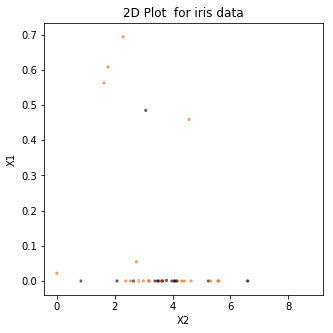

In [87]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot  for iris data")
plt.savefig("2D_plot_encoded_iris_data.png")
plt.show()
plt.close()

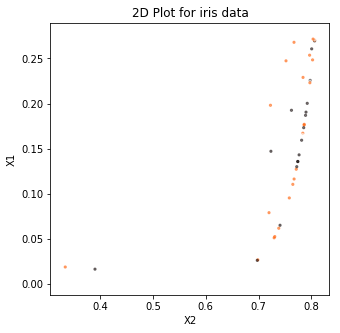

In [88]:
plt.scatter(decoded_imgs[:,0],decoded_imgs[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot for iris data")
plt.savefig("2D_plot_decoded_iris_data.png")
plt.show()
plt.close()

In [56]:
print(decoded_imgs[0])


[ 0.39064372  0.01667901  0.04166339  0.69861126  0.99308383  0.94763458
  0.95748955  0.40573239  0.13041796  0.19565164  0.25107059  0.26933277
  0.39995766  0.21901417  0.75125313  0.12295875  0.47692451  0.60045606
  0.65195233  0.00886433  0.7326864   0.94591415  0.90482897  0.18269475
  0.99273503  0.15211248  0.12899996  0.80879098  0.50748533  0.01318248
  0.53185475  0.6373316 ]


In [57]:
#implementing RBM 
import tensorflow as tf


In [59]:
#creating RBM layers
visible_bias=tf.placeholder("float",[32]) 
hidden_bias=tf.placeholder("float",[2])


In [60]:
#define weights among the input and and hidden layer nodes. W=weight matrix ,a tensor of 32x500
W=tf.placeholder("float",[32,2])

In [61]:
#forward pass
v0=tf.placeholder("float",[None,32])
_h0=tf.nn.sigmoid(tf.matmul(v0,W)+hidden_bias) #probabilities of the hidden units
h0=tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0)))) #sample activation given the input

In [62]:
#backward pass i.e reconstruction
_v1=tf.nn.sigmoid(tf.matmul(h0,tf.transpose(W))+visible_bias)
v1=tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1)))) #sample input given the activation
h1=tf.nn.sigmoid(tf.matmul(v1,W)+hidden_bias)

In [63]:
#Positive gradient only depends on input
#Negative gradient only depends on model
#Contrastive Divergence is actually matrix of values that is computed and used to adjusty values of W,W is update to new value W'
#as W'=W+alpha*CD
#alpha=learning rate

alpha=0.5
w_positive_grad=tf.matmul(tf.transpose(v0),h0)
w_negative_grad=tf.matmul(tf.transpose(v1),h1)
CD=(w_positive_grad-w_negative_grad)/tf.to_float(tf.shape(v0)[0])
W_updated=W + alpha*CD
visible_bias_updated=visible_bias + tf.reduce_mean(v0-v1,0)
hidden_bias_updated=hidden_bias + tf.reduce_mean(h0-h1,0)


In [64]:
#calculate error : to show difference between the data and its reconstruction

error=tf.reduce_mean(tf.square(v0-v1))

In [65]:
#start the session and initialize the variables
cur_w=np.zeros([32,2],np.float32)
cur_visible_bias=np.zeros([32],np.float32)
cur_hidden_bias=np.zeros([2],np.float32)
prv_w=np.zeros([32,2],np.float32)
prv_visible_bias=np.zeros([32],np.float32)
prv_hidden_bias=np.zeros([2],np.float32)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)


In [67]:
sess.run(error,feed_dict={v0:input_arr, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })

0.49739584

Epoch : 0 reconstruction error : 0.334375
Epoch : 1 reconstruction error : 0.061979
Epoch : 2 reconstruction error : 0.041146
Epoch : 3 reconstruction error : 0.044271
Epoch : 4 reconstruction error : 0.030729
Epoch : 5 reconstruction error : 0.030208
Epoch : 6 reconstruction error : 0.025521
Epoch : 7 reconstruction error : 0.023958
Epoch : 8 reconstruction error : 0.026042
Epoch : 9 reconstruction error : 0.020833
Epoch : 10 reconstruction error : 0.020833
Epoch : 11 reconstruction error : 0.027083
Epoch : 12 reconstruction error : 0.022917
Epoch : 13 reconstruction error : 0.026563
Epoch : 14 reconstruction error : 0.020312
Epoch : 15 reconstruction error : 0.016146
Epoch : 16 reconstruction error : 0.027604
Epoch : 17 reconstruction error : 0.018750
Epoch : 18 reconstruction error : 0.021875
Epoch : 19 reconstruction error : 0.017708
Epoch : 20 reconstruction error : 0.019792
Epoch : 21 reconstruction error : 0.017708
Epoch : 22 reconstruction error : 0.021875
Epoch : 23 reconstruc

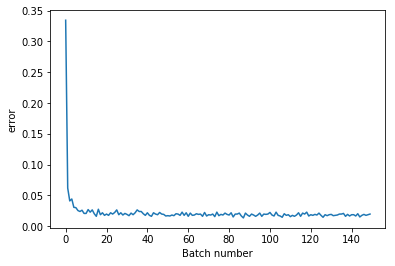

In [68]:
#Parameters for training
epochs= 150
batchsize=6
weights=[]
errors=[]

for epochs in range(epochs):
    for start,end in list(zip(range(0,len(input_arr),batchsize), range(batchsize, len(input_arr),batchsize))):
        batch=input_arr[start:end]
        cur_w = sess.run(W_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        cur_visible_bias = sess.run(visible_bias_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        cur_hidden_bias =  sess.run(hidden_bias_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        prv_w = cur_w
        prv_visible_bias = cur_visible_bias
        prv_hidden_bias = cur_hidden_bias
        if start%10000==0:
            errors.append(sess.run(error,feed_dict={v0:input_arr, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias }))
            weights.append(cur_w)
    
    print('Epoch : %d' % epochs,'reconstruction error : %f' %errors[-1])
    
plt.plot(errors)
plt.xlabel("Batch number")
plt.ylabel("error")
plt.show()
    


In [69]:
uw=weights[-1].T
uw #a weight matrix of shape 32x2

array([[ 2.14411497, -2.04351735, -2.21069169, -1.08212662,  2.29083586,
         2.18522525,  2.24504066, -0.59036398, -1.91219938, -2.1254468 ,
        -2.19719195, -2.15872097,  2.15344334, -2.25499344, -2.37730408,
        -2.20007706,  2.135741  ,  2.11966538, -1.84981835, -1.94569945,
         1.87990189,  1.99106693,  1.92713892, -2.16400051,  2.28658414,
        -1.25413847, -2.15184355,  2.24557137, -0.78863019, -1.82143593,
         2.30368257, -1.70653486],
       [ 2.06485939, -2.00786209, -2.1653161 , -1.07858157,  2.1914866 ,
         2.0849824 ,  2.16173983, -0.55363989, -1.875983  , -2.06546998,
        -2.16510487, -2.12409902,  2.0511713 , -2.24075174, -2.33339834,
        -2.13555908,  2.03187895,  2.04427433, -1.8011874 , -1.92570996,
         1.79562318,  1.88325703,  1.83018637, -2.15700483,  2.19705749,
        -1.23709321, -2.10222292,  2.15634751, -0.75787479, -1.77548313,
         2.23295927, -1.70156777]], dtype=float32)

In [85]:
weights=np.asarray(weights)
print(weights.shape)
temp=np.dot(input_arr,weights[-1])
print(temp.shape)

(150, 32, 2)
(60, 2)


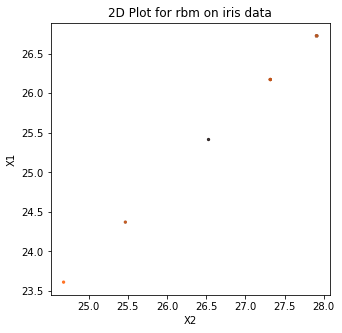

In [90]:
plt.scatter(temp[:,0],temp[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot for rbm on iris data")
plt.savefig("2D_plot_rbm_iris_data.png")
plt.show()
plt.close()

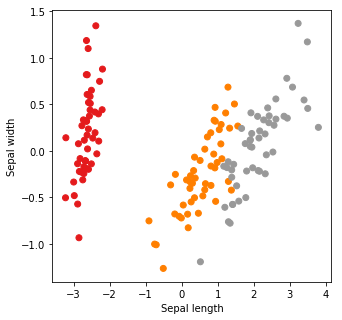

In [95]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()